In [1]:
libraries = c("dplyr","ggplot2","gridExtra","RColorBrewer","zoo","scales")
for(x in libraries) {
    library(x,character.only=TRUE,warn.conflicts=FALSE) }

if (Sys.info()[['sysname']]=='Windows') {
    windowsFonts(Times = windowsFont("Times New Roman"))
    theme_set(theme_bw(base_size=12,base_family='Times')) 
} else { theme_set(theme_bw(base_size=12)) }

# Initialization of array for recorded plots
plot_point_sizes <- c(); nm <- c(); plot_point_sizes <- list()


# clrs = c("black",brewer.pal(8,"Set1")[4],brewer.pal(8,"Set1")[2])
# clrs = rep(brewer.pal(8,"Set1")[2],3)
clrs = rep(brewer.pal(8,"Greys")[6],3)

clrs_plt = brewer.pal(8,"Spectral") %>% rev #c("white",brewer.pal(6,"YlOrBr"))

Warning message:
“package ‘dplyr’ was built under R version 3.5.2”

[1] "Static"


[1] 1.483189

[1] "Periodic"


[1] 1.299811

[1] "Optimal"


[1] 1.235089

[1] "Plotting"


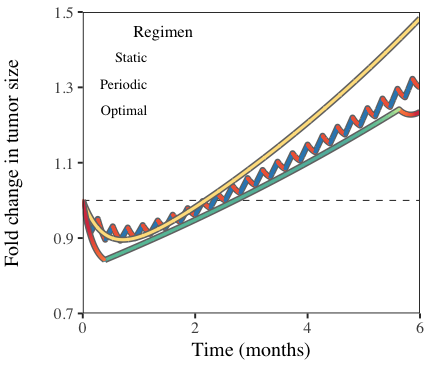

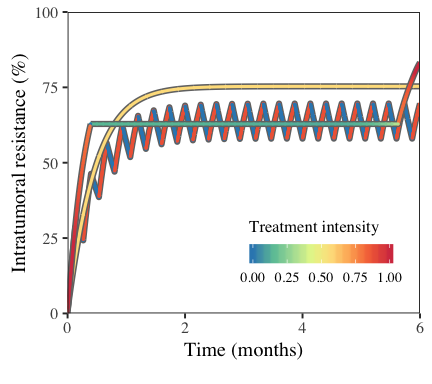

In [118]:
cs = c(3.6,3.2)
options(repr.plot.width=cs[1],repr.plot.height=cs[2])

cln_nms = c("time","sigma","resistance","size")
read.table(file="../figures/draft/Fig7-trj_periodic.csv",header=FALSE,sep=",",col.names=cln_nms) %>% 
    as.data.frame %>% mutate(time=time/30,resistance=100*resistance) -> df_periodic
read.table(file="../figures/draft/Fig7-trj_const.csv",header=FALSE,sep=",",col.names=cln_nms) %>% 
    as.data.frame %>% mutate(time=time/30,resistance=100*resistance) -> df_const
read.table(file="../figures/draft/Fig7-trj_optimal.csv",header=FALSE,sep=",",col.names=cln_nms) %>% 
    as.data.frame %>% mutate(time=(max(time)-time)/30,resistance=100*resistance) -> df_optimal

print("Static")
df_const %>% tail(1) %>% .$size

print("Periodic")
df_periodic %>% tail(1) %>% .$size

print("Optimal")
df_optimal %>% tail(1) %>% .$size

print("Plotting")
sz = 1.75; fc = .5
x0 = .4; len_seg = 1.8
y0 = 1.45

p1 = df_periodic %>% ggplot(aes(x=time,y=size)) +
    geom_hline(yintercept=1,size=.25,color="black",linetype="dashed") +
    geom_path(color=clrs[1],size=sz) + 
    geom_path(aes(color=sigma),lineend="round",size=sz*fc) +
    geom_path(data=df_const,color=clrs[2],size=sz) + 
    geom_path(data=df_const,aes(color=sigma),lineend="round",size=sz*fc) +
#     geom_path(data=df_optimal,aes(x=max(time)-time),color=clrs[3],size=sz) + 
#     geom_path(data=df_optimal,aes(x=max(time)-time,color=sigma),lineend="round",size=sz*fc) 
    geom_path(data=df_optimal,aes(x=time,y=filter(df_optimal,time==min(time))$size/size),color=clrs[3],size=sz) + 
    geom_path(data=df_optimal,aes(x=time,y=filter(df_optimal,time==min(time))$size/size,color=sigma),lineend="round",size=sz*fc) +
    theme_bw(base_size=12,base_family='Times') + 
    labs(x="Time (months)",y="Fold change in tumor size") +
    scale_color_gradientn(limits=c(0,1),oob=squish, 
                         colours=clrs_plt,
                         values=seq(0,1,length.out=6)) +
    scale_x_continuous(expand=c(0,0),breaks = seq(0,6,2)) + 
    scale_y_continuous(expand=c(0,0)) +
    coord_cartesian(ylim=c(0.7,1.5)) +
    guides(color=FALSE) +
    theme(
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        axis.title.y=element_text(vjust=7),     
        plot.margin = unit(c(.5,.5,1,1.3),"lines"),
        legend.background = element_rect(fill="white")) +
    annotate("text",x=x0+.5,y=y0,label='Regimen',colour="black",size=3.5,fontface=1,hjust=0,family="Times") +
    annotate("text",x=x0+.75,y=y0-0.14,label='Periodic',colour="black",size=3,fontface=1,hjust=1,vjust=.5,family="Times") +
    annotate("text",x=x0+.75,y=y0-0.07,label='Static',colour="black",size=3,fontface=1,hjust=1,vjust=.5,family="Times") +
    annotate("text",x=x0+.75,y=y0-0.21,label='Optimal',colour="black",size=3,fontface=1,hjust=1,vjust=.5,family="Times")
p1

p2 = df_periodic %>% ggplot(aes(x=time,y=resistance)) +
    geom_path(color=clrs[1],size=sz) + 
    geom_path(aes(color=sigma),lineend="round",size=sz*fc) +
    geom_path(data=df_const,color=clrs[2],size=sz) + 
    geom_path(data=df_const,aes(color=sigma),lineend="round",size=sz*fc) +
    geom_path(data=df_optimal,color=clrs[3],size=sz) + 
    geom_path(data=df_optimal,aes(color=sigma),lineend="round",size=sz*fc) +
    theme_bw(base_size=12,base_family='Times') + 
    labs(x="Time (months)",y="Intratumoral resistance (%)") +
    scale_color_gradientn(limits=c(0,1),oob=squish,
                          colours=clrs_plt,
                          values=seq(0,1,length.out=6)) +
    scale_x_continuous(expand=c(0,0),breaks = seq(0,6,2)) +
    scale_y_continuous(expand=c(0,0)) +
    coord_cartesian(ylim=c(0,100)) +
    guides(color=guide_colourbar(title="Treatment intensity",title.position="top",title.vjust=1)) +
    theme(
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        legend.text=element_text(size=8.5),
        legend.key.height = unit(.8, 'lines'),
        legend.title=element_text(size=10,vjust=1),
        legend.direction = "horizontal", 
        legend.position = c(.72,.2),
        legend.key = element_rect(size = 5),
        plot.margin = unit(c(.5,.5,1,.5),"lines")
    )
p2

ggsave(plot=p1,width=cs[1],height=cs[2],filename="../figures/draft/Fig5-A.pdf",useDingbats=FALSE)
ggsave(plot=p2,width=cs[1],height=cs[2],filename="../figures/draft/Fig5-B.pdf",useDingbats=FALSE)

# Optimal treatment for varied lengths of time horizons

[1] "Optimal"


[1] 20.72466

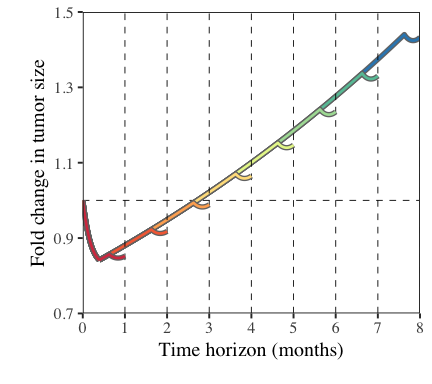

In [104]:
cs = c(3.6,3.2)
options(repr.plot.width=cs[1],repr.plot.height=cs[2])

cln_nms = c("T","time","sigma","resistance","size")
read.table(file="../figures/draft/Fig7X-trjs_optimal.csv",header=FALSE,sep=",",col.names=cln_nms) %>% 
    as.data.frame -> df_optimal

print("Optimal")
df_optimal %>% tail(1) %>% .$size

sz = 1.5; fc = .5
x0 = .4; len_seg = 1.8
y0 = 1.9

p1 = ggplot() +
    geom_hline(yintercept=1,size=.25,color="black",linetype="dashed")

idx = 1
for (T0 in rev(unique(df_optimal %>% filter(T<=240) %>% .$T))) {
    df_optimal %>% filter(T==T0) %>% mutate(time=(max(time)-time)/30,resistance=100*resistance) -> df_optimal0
    size0 = filter(df_optimal0,time==min(time))$size
    df_optimal0$size = size0/df_optimal0$size
#     print(df_optimal0 %>% arrange(time))
    p1 = p1 + 
        geom_vline(xintercept=T0/30,size=.25,color="black",linetype="dashed") +
    geom_path(data=df_optimal0,aes(x=time,y=size),color=clrs[1],size=sz) +
    geom_path(data=df_optimal0,aes(x=time,y=size),color=clrs_plt[idx],size=fc*sz)  
    idx = idx + 1
}

p1 = p1 + 
    theme_bw(base_size=12,base_family='Times') + 
    labs(x="Time horizon (months)",y="Fold change in tumor size") +
    scale_color_gradientn(limits=c(0,1),oob=squish, 
                         colours=clrs_plt,
                         values=seq(0,1,length.out=6)) +
    scale_x_continuous(expand=c(0,0),breaks = seq(0,18,1)) + 
    scale_y_continuous(expand=c(0,0)) +
    coord_cartesian(ylim=c(0.7,1.5)) +
    theme(
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        plot.margin = unit(c(.5,.5,1,1.3),"lines"),
        legend.background = element_rect(fill="white")) 

p1

ggsave(plot=p1,width=cs[1],height=cs[2],filename="../figures/draft/FigSXa.pdf",useDingbats=FALSE)

In [87]:
max(df_optimal$T/30)

[1] 44

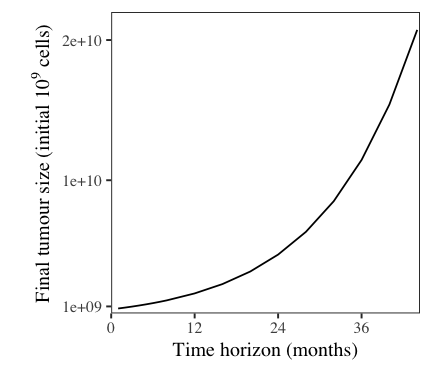

In [103]:
df_optimal %>% group_by(T) %>% filter(time==T) %>% ungroup %>% mutate(T = T/30) %>% 
    ggplot(aes(x=T,y=1e9*size)) +
    geom_path() +
    labs(x='Time horizon (months)', y=expression('Final tumour size (initial '*10^9*' cells)')) +
    scale_x_continuous(expand=c(0,0),breaks = seq(0,48,12)) + 
    scale_y_continuous(expand=c(0,0),breaks = c(1e9,1e10,2e10)) + 
    coord_cartesian(xlim=c(0,max(df_optimal$T/30)+.4),ylim=c(5e8,2.2e10)) +
#     scale_y_log10(breaks = c(1e8,1e9,1e10),
#               labels = trans_format("log10", math_format(10^.x))) +
    theme_bw(base_size=12,base_family='Times') + 
    theme(
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        plot.margin = unit(c(.5,.5,1,1.3),"lines"),
        legend.background = element_rect(fill="white")) -> p1

p1

ggsave(plot=p1,width=cs[1],height=cs[2],filename="../figures/draft/FigSXb.pdf",useDingbats=FALSE)

# Another figure for solution of the optimal control problem

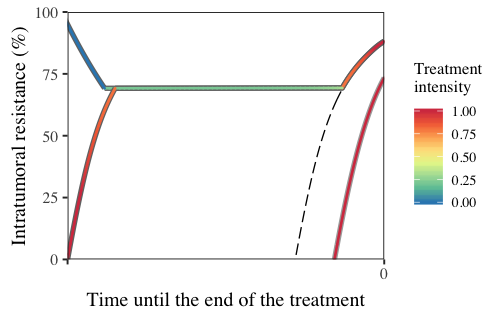

In [125]:
cs = c(4.2,2.75)
options(repr.plot.width=cs[1],repr.plot.height=cs[2])

cln_nms = c("trajectory","time","sigma","resistance","size")
read.table(file="../figures/draft/Fig6-trjs_optimal-final.csv",header=TRUE,sep=",",col.names=cln_nms) %>% 
    as.data.frame %>% mutate(time=time/30,resistance=100*resistance) -> df

# clrs = brewer.pal(9,"Set1")
sz = 1.5; fc = 0.5
x0 = 1.4; len_seg = 1.8

tmx = 4

p2 = df %>% filter(trajectory!=0) %>% 
    ggplot(aes(x=tmx-time,y=resistance,group=factor(trajectory))) +
        geom_path(data=filter(df,trajectory==0),color="black",size=sz*.25,linetype=5) + 
        geom_path(data=filter(df,trajectory==1),color="darkgrey",size=sz) + 
        geom_path(data=filter(df,trajectory==1),aes(color=sigma),lineend="round",size=sz*fc) +
        geom_path(data=filter(df,trajectory==2),color=clrs[3],size=sz) + 
        geom_path(data=filter(df,trajectory==2),aes(color=sigma),lineend="round",size=sz*fc) +
        geom_path(data=filter(df,trajectory==3),color=clrs[2],size=sz) + 
        geom_path(data=filter(df,trajectory==3),aes(color=sigma),lineend="round",size=sz*fc) +
#         geom_path(aes(color=sigma),lineend="round",size=sz*fc) +
        theme_bw(base_size=12,base_family='Times') + 
        labs(x="Time until the end of the treatment",y="Intratumoral resistance (%)") +
        scale_color_gradientn(limits=c(0,1),oob=squish,
                              colours=clrs_plt,
                              values=seq(0,1,length.out=6)) +
        scale_x_continuous(expand=c(0,0),breaks=c(0,tmx),labels=c("",0)) +
        scale_y_continuous(expand=c(0,0)) +
        coord_cartesian(ylim=c(0,100),xlim=c(0,tmx)) +
        guides(color=guide_colourbar(title="Treatment\nintensity",title.position="top",title.vjust=2)) +
        theme(
            panel.grid.major = element_blank(),
            panel.grid.minor = element_blank(),
            legend.text=element_text(size=8.5),
            legend.key.height = unit(.8, 'lines'),
            legend.title=element_text(size=10),
            legend.direction = "vertical", 
            axis.title.x = element_text(vjust=0),
            legend.key = element_rect(size = 5),
            plot.margin = unit(c(.5,.5,1,.5),"lines")
        )
p2

ggsave(plot=p2,width=cs[1],height=cs[2],filename="../figures/draft/Fig4.pdf",useDingbats=FALSE)